In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [87]:
file = "crypto_data.csv"
df = pd.read_csv(file, index_col = 0)
df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [88]:
df_trading = df.loc[df["IsTrading"] == True]
df_trading

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [89]:
df_trading= df_trading.drop(labels="IsTrading", axis = 1)
df_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [90]:
df_trading = df_trading.dropna( axis = 0)
df_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [91]:
df_trading = df_trading.loc[df_trading["TotalCoinsMined"] > 0]
df_trading

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [92]:
df_trading= df_trading.drop(labels="CoinName", axis = 1)
df_trading

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,3.14159E+11
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [93]:
df_trading = pd.get_dummies(data= df_trading, columns = ["Algorithm", "ProofType"])
df_trading

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.14159E+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
scaler = StandardScaler().fit(df_trading)
X_scaled = scaler.transform(df_trading)
X_scaled

array([[-0.11710816, -0.15287029, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.14500899, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494542,  4.48942055, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217936, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694816, -0.15255997, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710535, -0.15285551, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [97]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=0.90)
principal_comp = pca.fit_transform(X_scaled)
principal_comp.shape

(532, 74)

In [109]:
pca.explained_variance_.sum()

88.47283453252192

In [110]:
from sklearn.manifold import TSNE


In [111]:
tsne = TSNE(perplexity=50)
features = tsne.fit_transform(principal_comp)
features.shape

(532, 2)

In [113]:
X = features[:,0]
Y = features[:,1]

In [114]:
import matplotlib.pyplot as plt

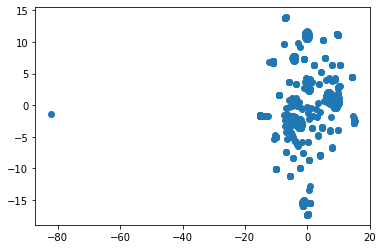

In [115]:
plt.scatter(X,Y)

In [119]:
from sklearn.cluster import KMeans
inertia_list = []

In [120]:
k = [1,2,3,4,5,6,7,8,9,10]

In [121]:
for cluster in k:
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(principal_comp)
    inertia_list.append(kmeans.inertia_)

In [122]:
inertia_list


[46979.075136769156,
 45912.29142727133,
 44654.949489641374,
 44094.50117105167,
 43091.53282719002,
 42331.901437745735,
 41668.32454158681,
 40248.86122289442,
 39920.00365227249,
 38555.76974317186]

<AxesSubplot:xlabel='k'>

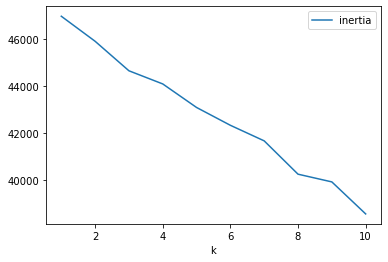

In [123]:
df = pd.DataFrame({"k":k,"inertia":inertia_list})
df.plot.line(x="k",y="inertia")

In [ ]:
# The Crypto currency cannot be clustered, we can see this due to the elbow plot being linear
# and without any defined bends. This could be due to high variance in the total coin supply
#and different use of algorithmns